# Statistics II

Welcome to Statistics II! In this part of the course we extend our understanding of statistics through R. It covers the following topics:

- <a href='#Covariance and Correlation'>Covariance and Correlation</a>  
- <a href='#Hypothesis Testing'>Hypothesis Testing</a>  
-   <a href='#Laws of Large Numbers'>Laws of Large Numbers</a>
-   <a href='#The Central Limit Theorem'>The Central Limit Theorem</a>
- <a href='#Joint Probability'>Joint Probability</a>  
-  <a href='#Conditional Probability'>Conditional Probability</a>
- <a href="#Bayes' Theorem">Bayes' Theorem</a>
- <a href='#Statistics of Vectors'>Statistics of Vectors</a>
- <a href='#Higher Population Moments'>Higher Population Moments</a>


### Covariance and Correlation <a id='Covariance and Correlation'></a>

These two concepts are pretty intuitive and many of you probably already have a strong grasp of them. They're also absolutely foundational for metrics so we'll cover them in detail. The best way to remember what these concepts are is covariance is co-variance and correlation is just standardised covariance. By that we simply mean that covariance is the amount of variance which is shared by two different random variables. Mathematically this is $Cov(X,Y)=\frac{1}{n}\sum\limits_{i=1}^{n}(x_i-\bar{x})(y_i-\bar{y})=E((X-E(X))(Y-E(Y)))$. What does this formula mean? It is a measure of the average which $X$ and $Y$ deviate from their means simulatenously. That means that if observations of $X$ and $Y$ (so $x_i, y_i$) are likely to vary from their means at the same time in the same direction then they will have a large positive covariance. If they're likely to vary from their means at the same time in different directions they will have a large negative covariance. If they're not likely to vary from their means at the same time they won't have a large covariance. 

Correlation is just a way to standardise 'large' and 'small'. Covariance is in the same units as variance (like $£^2$), which isn't always that easy to make sense of. Correlation divides covariance by the terms' individual standard deviations to ensure we get a number between -1 and 1, so $Corr(X,Y)=\dfrac{Cov(X,Y)}{sd(X)sd(Y)}.$ If you want to know why correlation has to be between -1 and 1 then you need the 'Cauchy Schwartz Inequality', but we won't cover that here.

Let's see how R can help us calculate covariance and correlation using a real dataset. We'll use a dataset which contains essentially every player statistic in Fifa '19:

In [1]:
data<-read.csv('https://raw.githubusercontent.com/hands-on-econ/Hands-On-Econ/master/Datasets/data-3.csv')
head(data,10)

X,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,⋯,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release.Clause
<int>,<int>,<fct>,<int>,<fct>,<fct>,<fct>,<int>,<int>,<fct>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,⋯,96,33,28,26,6,11,15,14,8,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,⋯,95,28,31,23,7,11,15,14,11,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,⋯,94,27,24,33,9,9,15,15,11,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,⋯,68,15,21,13,90,85,87,88,94,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,⋯,88,68,58,51,15,13,5,10,13,€196.4M
5,183277,E. Hazard,27,https://cdn.sofifa.org/players/4/19/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,91,Chelsea,⋯,91,34,27,22,11,12,6,8,8,€172.1M
6,177003,L. Modrić,32,https://cdn.sofifa.org/players/4/19/177003.png,Croatia,https://cdn.sofifa.org/flags/10.png,91,91,Real Madrid,⋯,84,60,76,73,13,9,7,14,9,€137.4M
7,176580,L. Suárez,31,https://cdn.sofifa.org/players/4/19/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,91,91,FC Barcelona,⋯,85,62,45,38,27,25,31,33,37,€164M
8,155862,Sergio Ramos,32,https://cdn.sofifa.org/players/4/19/155862.png,Spain,https://cdn.sofifa.org/flags/45.png,91,91,Real Madrid,⋯,82,87,92,91,11,8,9,7,11,€104.6M


Clearly there's a lot here, so let's check out the columns we can use to start with:

In [2]:
colnames(data)

[1] "X"                        "ID"                      
 [3] "Name"                     "Age"                     
 [5] "Photo"                    "Nationality"             
 [7] "Flag"                     "Overall"                 
 [9] "Potential"                "Club"                    
[11] "Club.Logo"                "Value"                   
[13] "Wage"                     "Special"                 
[15] "Preferred.Foot"           "International.Reputation"
[17] "Weak.Foot"                "Skill.Moves"             
[19] "Work.Rate"                "Body.Type"               
[21] "Real.Face"                "Position"                
[23] "Jersey.Number"            "Joined"                  
[25] "Loaned.From"              "Contract.Valid.Until"    
[27] "Height"                   "Weight"                  
[29] "LS"                       "ST"                      
[31] "RS"                       "LW"                      
[33] "LF"                       "CF"                      
[35] "RF"                       "RW"                      
[37] "LAM"                      "CAM"                     
[39] "RAM"                      "LM"                      
[41] "LCM"                      "CM"                      
[43] "RCM"                      "RM"                      
[45] "LWB"                      "LDM"                     
[47] "CDM"                      "RDM"                     
[49] "RWB"                      "LB"                      
[51] "LCB"                      "CB"                      
[53] "RCB"                      "RB"                      
[55] "Crossing"                 "Finishing"               
[57] "HeadingAccuracy"          "ShortPassing"            
[59] "Volleys"                  "Dribbling"               
[61] "Curve"                    "FKAccuracy"              
[63] "LongPassing"              "BallControl"             
[65] "Acceleration"             "SprintSpeed"             
[67] "Agility"                  "Reactions"               
[69] "Balance"                  "ShotPower"               
[71] "Jumping"                  "Stamina"                 
[73] "Strength"                 "LongShots"               
[75] "Aggression"               "Interceptions"           
[77] "Positioning"              "Vision"                  
[79] "Penalties"                "Composure"               
[81] "Marking"                  "StandingTackle"          
[83] "SlidingTackle"            "GKDiving"                
[85] "GKHandling"               "GKKicking"               
[87] "GKPositioning"            "GKReflexes"              
[89] "Release.Clause"

We expect there to be a pretty high covariance and correlation between a variable like 'BallControl' and overall score. We can check this as follows:

In [3]:
data1<-na.omit(data)
cov(data1[,'BallControl'],data1[,'Overall'])
cor(data1[,'BallControl'],data1[,'Overall'])

[1] 53.06634

[1] 0.4600335

We used `na.omit()` to make sure that null values weren't present in our data. We didn't *delete* these but just created a new dataset where they weren't present. If we want to check whether our previous formula for correlation is actually right we can do this by using the function `sd()` to check:

In [4]:
cov(data1[,'BallControl'],data1[,'Overall'])/(sd(data1[,'BallControl'])*sd(data1[,'Overall']))==
cor(data1[,'BallControl'],data1[,'Overall'])

[1] TRUE

Great. Also we can see R doesn't mind that we went over two lines. It knows to keep looking at the start of the next line if no command has been entered. If we want to see this graphically we can do that too:

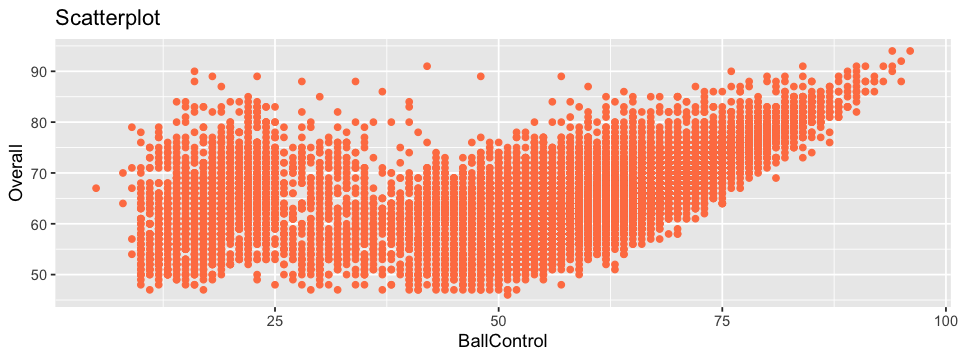

In [5]:
options(repr.plot.width=8, repr.plot.height=3)
library(ggplot2)
ggplot(data1,aes(x=BallControl,y=Overall))+geom_point(colour='coral')+ggtitle('Scatterplot')

What about if we thought this relationship was different for goalkeepers? Well first we find how goalkeepers are enocded:

In [6]:
unique(data1[,'Position'])

[1] RF  ST  LW  GK  RCM LF  RS  RCB LCM CB  LDM CAM CDM LS  LCB RM  LAM LM  LB 
[20] RDM RW  CM  RB  RAM CF  RWB LWB
28 Levels:  CAM CB CDM CF CM GK LAM LB LCB LCM LDM LF LM LS LW LWB RAM ... ST

Then we use the `colour` attribute in `aes()` for the command `ggplot()` to seperate the data into whether each player is a goalkeeper or not:

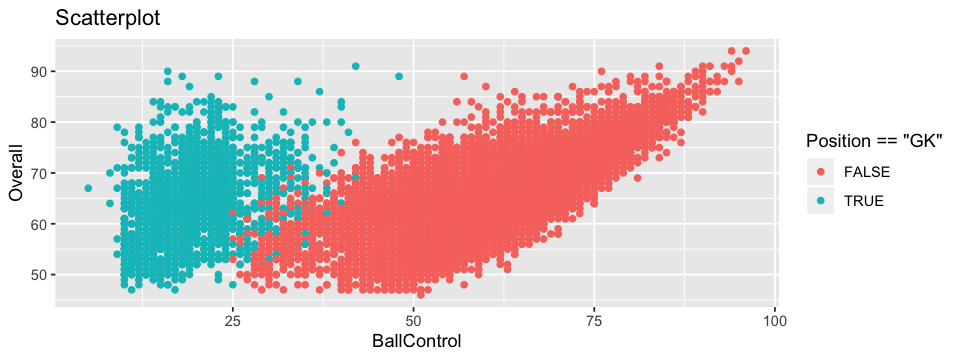

In [7]:
options(repr.plot.width=8, repr.plot.height=3)
library(ggplot2)
ggplot(data1,aes(x=BallControl,y=Overall,colour=Position=='GK'))+geom_point()+ggtitle('Scatterplot')

We were right! Goalkeepers display a much weaker relationship between 'BallControl'and 'Overall'. There is a bit more we can do to see why this makes sense. The first is by simply comparing the correlations for goalkeepers and non-goalkeepers as follows:

In [8]:
cor(data1[data1['Position']=='GK','Overall'],data1[data1['Position']=='GK','BallControl'])
cor(data1[data1['Position']!='GK','Overall'],data1[data1['Position']!='GK','BallControl'])

[1] 0.3417241

[1] 0.717933

As expected. The second thing we can do is add the individual histograms to our previous plot to get a better sense of how the variance of Overall and BallControl line up for goalkeepers and non-goalkeepers. We introduce `coord_flip()`to flip our Overall  here and `theme(legend.position = "none")` to turn off our legends. 

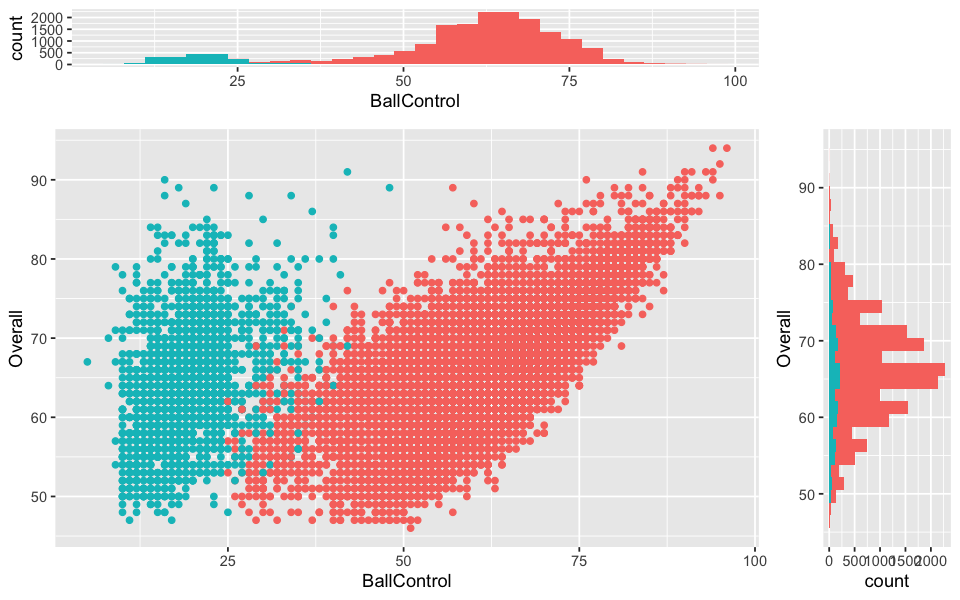

In [9]:
options(repr.plot.width=8, repr.plot.height=5)
library(gridExtra)
a<-ggplot(data1,aes(x=BallControl,fill=Position=='GK'))+geom_histogram(bins=30)+theme(legend.position = "none")
b<-ggplot() + theme_void()
c<-ggplot(data1,aes(x=BallControl,y=Overall,colour=Position=='GK'))+geom_point()+theme(legend.position = "none")
d<-ggplot(data1,aes(x=Overall,fill=Position=='GK'))+geom_histogram(bins=30)+coord_flip()+theme(legend.position = "none")
grid.arrange(a,b,c,d,ncol=2,widths=c(4,1),heights=c(1,4))

Awesome, right! What this shows us is that while the goalkeepers' Overall scores vary significantly, their BallControl does not. By contrast non-goalkeepers' BallControl varies a lot, but roughly in the same way as their Overall. One more way to see this is as follows:

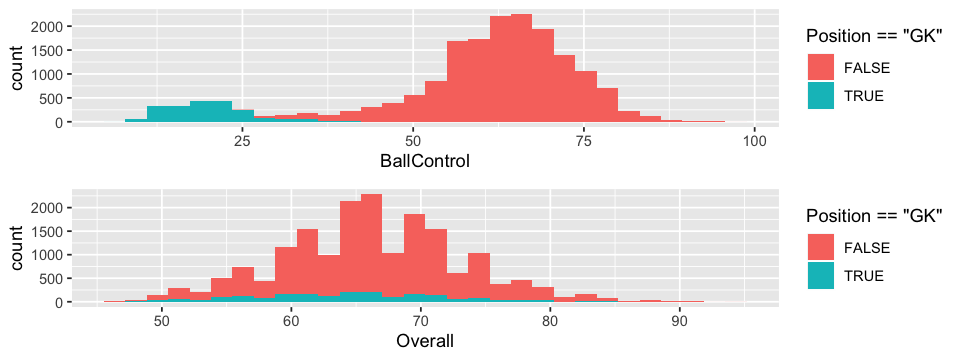

In [10]:
options(repr.plot.width=8, repr.plot.height=3)
a<-ggplot(data1,aes(x=BallControl,fill=Position=='GK'))+geom_histogram(bins=30)
b<-ggplot(data1,aes(x=Overall,fill=Position=='GK'))+geom_histogram(bins=30)
grid.arrange(a,b)

The goalkeepers' histograms line up a lot less, so their Overall/BallControl correlation is much lower than the non-goalkeepers. Hopefully you're starting to see just how useful R can be to get a sense of our data.

### Joint Probability <a id='Joint Probability'></a>

We have already covered a range of different probability distributions for single random variables but what we haven't seen so far is how pairs or vectors of random variables can be distributed. This of course is something you will have studied before but it's important enough to merit a second treatment here. We'll start with the bivariate case because this is much simpler. The joint probability of two random variables $X$ and $Y$ is the probability that$X=x$ and that $Y=y$. In the discrete case this is $P(X=x,Y=y)$ and in the continuous case $f(x,y)$. When $P(X=x,Y=y)=P(X=x)P(Y=y)$ or $f(x,y)=f(x)f(y)$ for all $x$ and $y$ we say that $X$ and $Y$ are **independent** and if not then we say they are **dependent**. The simplest example of dependent vs. independent random variables is the probability of selecting two marbles from a collection of two white marbles and one black marbles; with and without replacement. Let's do this now, using the convention X is the first draw and Y is the second:

In [178]:
a<-c('White','White','Black')
sample(a,2,replace=T)

[1] "Black" "Black"

In [179]:
x_y[1]

[1] "White"

The key feature which makes X and Y either dependent or independent is whether the marbles are replaced after each draw. In the case we have just simulated the marbles are returned each time, so one occuring doesn't affect the chance of the other. Therefore the probability of selecting $X$ black and $Y$ white is $P(X=black,Y=white)=P(X=black)P(Y=white)=(\frac{1}{3})(\frac{2}{3})=0.2\dot{2}$. However the probability of selecting $X$ black and $Y$ white when we don't replace each marble *does* depend on what happens first.

In [180]:
a<-c('White','White','Black')
sample(a,2,replace=F)

[1] "White" "Black"

All we need to do is select a black marble first, because this guarantees a white marble second when we don't replace. Mathematically this means $P(X=black,Y=white)=(\frac{1}{3})(\frac{1}{1})=0.3\dot{3}\neq P(Y=white)=(\frac{1}{3})(\frac{2}{3})=0.2\dot{2}$. R will show us this bears out over a large number of samples:

In [181]:
x<-data.frame(matrix(ncol=2))
for (i in 1:5000) {x[i,]<-sample(a,2,replace=T)}
y<-data.frame(matrix(ncol=2))
for (i in 1:5000) {y[i,]<-sample(a,2,replace=F)}

In [182]:
sum(x[,1]=='Black'&x[,2]=='White')/5000
sum(y[,1]=='Black'&y[,2]=='White')/5000

[1] 0.2198

[1] 0.3294

So clearly dependent and independent distributions can be very closely linked. In independent joint distributions the probability of any random variable $X$  individually having value $x$ is just its usual probability function but in dependent distributions it is referred to as the 'marginal distribution' of X, or $f_X(x)$. 

Continuous example?

 ### Conditional Probability<a id='Conditional Probability'></a>



Conditional probability follows naturally from joint probability. We say the conditional distribution of y given x, is equal to the joint distribution of $x$ and $y$ divided by the marginal distribution of $x$ or $f(y\mid x)=\dfrac{f(x,y)}{f_X(x)}$. Likewise $f(x\mid y)=\dfrac{f(x,y)}{f_Y(y)}$. Continuing on with the previous example we can use conditional probability to find the probability that $P(X=black|Y=white)$ in both the replacement and non-replacement cases.

 ### Bayes' Theorem <a id="Bayes' Theorem"></a>



Bayes Theorem is an extremely useful application of conditional probability. It allows us to make sense of multiple events which are conditional on each other, something our brains are ***extremely*** bad at doing without priming. The simplest form of Bayes Theorem is the bivariate case: $P(A \mid B)=\dfrac{P(B \cap A)}{P(B)}$. This essentially means the probability of $A$ happening given that $B$ happens is the probability that probability that they both happen divided by the probability that $B$ happens. It is also common to see this written as  $P(A \mid B)=\dfrac{P(B \cap A)}{P(B)}$ but this is no different as:

$P(B \cap A)=P(A \cap B)=P(B \cap A)P(B)=P(A \cap B)P(A)$


The more general case is ($\neg$ means not):

 $P(A \mid B)=\dfrac{P(B \mid A)P(A)}{P(B \mid A)P(A)+P(B \mid \neg A)P(\neg A)}$

This case is much more useful because it allows us consider the probability of many different ways $A$ could not happen.  

A widely known application of Bayes' Theorem is in solving the Monty Hall problem: https://en.wikipedia.org/wiki/Monty_Hall_problem. If you don't remember then essentially a game show participant is trying to pick a car from behind one of three doors, two of which contain goats. The player chooses their door and one of the two they didn't choose is opened. They are then asked if they want to switch doors. 

The first part of the game is easy. The probability of choosing the car is just 1/3. The problem comes when the host (Monty) gives the player new information by opening one of the doors. In doing so he changes the probabilities involved in winning the car and thus the game! The reason for this is ***Monty can never open a door with the car behind it*** as the game would end. Therefore there are two cases: you have picked the car with the first guess and Monty is free to open either of the other two doors or you have not picked the car and Monty is forced to open the only other door without a car. These have probabilities of 1/3rd and 2/3rds respectively, corresponding to your likelihood of picking the car to start with. In the first case switching doors causes you to lose the car you originally picked and in the second switching gives you the car you didn't have to start with. It is therefore always better to switch doors as 2/3rds of the time you will not have selected the car to start with and therefore will gain the car by switching compared with the 1/3rd of the time where you have selected the car and you will lose it by switching. We can see this using R by 'playing' the Monty Hall problem 10,000 times:

In [229]:
a<-data.frame()
montyhall<-c('Goat','Goat','Car')
for (i in 1:10000) {game<-sample(montyhall,3)
                    onetwothree<-c(1,2,3)
    a[i,1]<-sample(onetwothree,1)
                a[i,2]<-game[a[i,1]]
                     if (a[i,2]=='Car') {a[i,3]<-sample(onetwothree[onetwothree!=a[i,1]],1)  
                                         a[i,4]<-game[onetwothree[onetwothree!=a[i,1]&onetwothree!=a[i,3]]]=='Car'}
                   else {b<-sample(onetwothree[onetwothree!=a[i,1]],1)
                   if (game[b]=='Goat') {a[i,3]<-b}
                   else {a[i,3]<-onetwothree[onetwothree!=a[i,1]&onetwothree!=b]}
                    a[i,4]<-TRUE}}

d<-a[,2]
a[,2]<-a[,3]
a[,3]<-d
colnames(a)<-c('Guess Door Number','Monty Opens','Behind Guess Door','Switch Wins Car?')

In [230]:
head(a,20)

Guess Door Number,Monty Opens,Behind Guess Door,Switch Wins Car?
<dbl>,<dbl>,<chr>,<lgl>
2,1,Car,FALSE
2,1,Goat,TRUE
3,1,Goat,TRUE
3,1,Goat,TRUE
1,3,Car,FALSE
2,3,Goat,TRUE
1,2,Goat,TRUE
1,3,Goat,TRUE
1,2,Goat,TRUE


In [231]:
mean(a[,4])

[1] 0.6581

So in roughly 2/3rd of our games switching from the original door meant winning the car, as we expected! So what does this have to do with conditional probability? Well we can show using Bayes' Theorem that the probability the original door has a car behind it remains at $\dfrac{1}{3}$ even when a goat is revealed behind another door, using the notation 'Car' as a car being behind the chosen door and 'Goat' as the probability a goat was revealed:

 $P(Car \mid Goat)=\dfrac{P(Goat \mid Car)P(Car)}{P(Goat \mid Car)P(Car)+P(Goat \mid \neg Car)P(\neg Car)}=\dfrac{1\times(\dfrac{1}{3})}{1\times(\dfrac{1}{3})+1\times(\dfrac{2}{3})}=\dfrac{1}{3}$

$P(Car)=\dfrac{1}{3}$ and $P(Goat)=\dfrac{2}{3}$ are pretty straightforward as they are just the probabilities there is a car and goat behind a random door respectively. The hardest thing about the Monty Hall problem is seeing why $P(Goat \mid Car)=P(Goat \mid \neg Car)=1$. This is just the Bayes' Theorem representation of Monty **always opening a door with a goat**! It doesn't change with a car being behind the original choice; it is just a certainty of this game! This means that now there are only two doors remaining the other door contains the car with probability of $\dfrac{2}{3}$, so switching is always sensible. There are many other applications of Bayes' Theorem and R can help us simulate lots of them to get a more intuitive understanding.

  ### Statistics of Vectors<a id='Statistics of Vectors'></a>



We had to do some of our statistics after we reviewed linear algebra because vectors (or even matricies!) can be made up entirely of random variables. This gives them their own sampling distribution which can also be written using linear algebra notation. We'll see in Econometrics I that linear algebra is extremely useful for describing certain econometric estimators and all of these estimators will have distributions which we'll need to be familiar with eventually. The simplest way to introduce how we can represent the statistical properties of a vector is with the joint Normal distribution.

The joint Normal distribution is the distribution followed be a vector which contains $n$ normally distributed random variables which are all independent, such as $X=\pmatrix{X_1  \cr X_2  \cr \vdots \cr X_n \cr}$, where $X_1\sim N(\mu_1,\sigma_1^2), ,...,X_n\sim N(\mu_n,\sigma_n^2),$. 

In this case we say that $X\sim N(\mu ,\Sigma )$ where $\mu=\pmatrix{\mu_1  \cr \mu_2  \cr \vdots \cr \mu_n \cr}$ and $\Sigma=\pmatrix{\sigma_{11}&\sigma_{12}&  \cdots& \sigma_{1n} \cr \sigma_{21}&\sigma_{22}&  \cdots& \sigma_{2n} \cr  \vdots& \vdots& \ddots &\vdots \cr \sigma_{n1}&\sigma_{n2} &  \cdots &  \sigma_{nn}\cr}$, with $\sigma_{ij}=Cov(X_i,X_j)$. $\Sigma$ is called the Covariance matrix, and represents the covariances between each of the random variables in $X$.

The independence criterion in this defintion is key. Vectors of normally distributed random variables don't necessarily follow the joint Normal distribution if they aren't independent. 

### Hypothesis Testing<a id='Hypothesis Testing'></a>

Hypothesis testing is an essential part of metrics so we need to understand it pretty well. Fortunately you probably already do because it's so intuitive. There are really just three parts to any hypothesis test: a test hypothesis (null and alternative), a test-statistic and a rejection rule. For example consider the test that the mean of some data is equal to 7. We don't know anything about the data but we have every single data point loaded into R. Before we go further we need to clarify what the alternative is, so let's just make it easy and say it's that the mean is not 7. So our hypotheses are: 

$H_0:\mu=7$

$H_1:\mu\neq7$

So part 1 done. What about a test statistic? Because we can't know the population mean of our data (I mean unless we use R's `rnorm()` function to generate them as we will in a second, but let's pretend like we didn't do this) we have to use the next best thing: the sample mean. We also don't know the population variance of our data so we have to use the sample error of the mean for our standard error, or $\dfrac{sd(X)}{\sqrt{n}}$. So our test statistic is $t=\dfrac{\bar{X}-7}{\dfrac{sd(X)}{\sqrt{n}}}$. We should know that this is distributed around the t-distribution as $sd(X)$ is distributed around the Chi-squared distribution with n degrees of freedom.

Now for our third and final part, the rejection rule. This is the value our test-statistic has to exceed for us to reject the null, so clearly it has to be related to the significance level of our test.  Say we want to be sure at the 5% level, so we look up the critical value of the t-distribution for our degrees of freedom at the *2.5% level* (two-sided test) and then we know to reject if the absolute value of our test-statistic exceeds this value, which we call $t_{crit}$. Now let's do it for real. First we generate our data (using `set.seed()` helps us be sure everyone will get the same results:

In [421]:
set.seed(1)
testdata<-rnorm(10000,7,20)

Now we check the critical value

In [422]:
t_crit<-qt(0.975,df=100)
t_crit

[1] 1.983972

Obviously we can pretty much just use the normal distribution because we have so much data. But it's good practice to stick with the t-distribution for now. Now we perform out test!

In [423]:
sampledata<-sample(testdata,100,replace=T)
mean(sampledata)
(sd(sampledata)/(length(sampledata))^0.5)
t<-(mean(sampledata)-7)/(sd(sampledata)/(length(sampledata))^0.5)
t
abs(t)>t_crit

[1] 6.849374

[1] 2.007274

[1] -0.07504016

[1] FALSE

So we don't find evidence to reject the null! We can check we've done everything right by using R's built in `t.test()` function:

In [424]:
t.test(sampledata,mu=7)


	One Sample t-test

data:  sampledata
t = -0.07504, df = 99, p-value = 0.9403
alternative hypothesis: true mean is not equal to 7
95 percent confidence interval:
  2.866508 10.832240
sample estimates:
mean of x 
 6.849374 


Yep! No rejection as the absolute value of the test-stat (-0.0750) is not greater than the critical value 1.96, so we did it all right. If we want to be *super sure* we can just make sure the p-value of our DIY test matches up with R's in-built test function. We don't need to do this because our test stats were the same but it's good practice:

In [425]:
2*pt(abs(-0.0750),df=10000,lower=F)

[1] 0.9402162

Yep! All good! We will do lots of hypothesis tests in Econometrics I-IV so we won't do any more here but all of them will follow this structure. The last thing we want to see is what Type I and II errors look like and what test power means. A **type I error** is rejecting a true null and a **type II error** is failing to reject a false null. These are more commonly referred to as 'false positives' and 'false negatives' respectively. This seems a little dry but an easy thought-exercise makes sure we never forget the difference; conversation styles. Consider two kinds of conversational style: argumentative and accepting. People with argumentative conversation styles are more prone to making type I errors. They are quick to point out when others are wrong and this means that they are more likely to point out something is wrong when it was actually right. People with accepting conversational styles are more prone to making type II errors. They are more likely to not point out something untrue as being false. If this idea makes sense then just remember the idea that people with arugmentative personalities tend to think highly of themselves and so the idea "I'm number one" maps pretty easily onto them being type I error-prone. 

We can see type I errors in R by repeating our previous randomisation many times.

In [426]:
x<-data.frame()
y<-data.frame()
for (i in 1:100) {for (j in 1:100) {x[j,i]<-sample(testdata,100)[j]}}
for (i in 1:100) {y[i,1]<-t.test(x[,i],mu=7)$statistic}
sum(abs(y)>t_crit)

[1] 5

This is a random result but is perfect! What we have found is that by taking 100 random samples of size 100 from the 'population' (the variable `testdata` containing 10,000 psuedorandom observations from the $N(7,20)$ distribution), t-tests on exactly 5 of those samples led to the rejection of the null at the 5% level! That is, 5% of the time we rejected a true null (conversation parallel: we told someone they were wrong when they weren't). This is exactly what we should have expected when testing at the 5% level! 

We set the signficance level of this test and got a given amount of type I errors. Of course if we conduct this again we are likely to get a different number of type I errors, but this value will be centred around 5 because we have conducted this test at the 5% level and there are 100 samples.

In [427]:
for (i in 1:10) {x<-data.frame()
y<-data.frame()
for (i in 1:100) {for (j in 1:100) {x[j,i]<-sample(testdata,100)[j]}}
for (i in 1:100) {y[i,1]<-t.test(x[,i],mu=7)$statistic}
print(sum(abs(y)>t_crit))}

[1] 2
[1] 3
[1] 8
[1] 3
[1] 8
[1] 5
[1] 5
[1] 6
[1] 5
[1] 4


It might seem like a trivial point but what all this should show us is that *we can set the amount of Type I errors!* This is cool because it means of the two kinds of mistake we can make in hypothesis testing we can deal with one pretty explicitly. What about Type II errors? Well these are a little harder... Essentially we get a small proportion of type II errors when we run 'clear tests', or have a null hypothesis which far enough from the true value to be rejected consistently. To see this more clearly let's change our testing hypotheses to (using the `mu` parameter):


$H_0:\mu=0$

$H_1:\mu\neq0$

We haven't changed our data so clearly the null is false. Type II errors are the number of false nulls which aren't rejected. 

In [428]:
x<-data.frame()
y<-data.frame()
for (i in 1:100) {for (j in 1:100) {x[j,i]<-sample(testdata,100)[j]}}
for (i in 1:100) {y[i,1]<-t.test(x[,i],mu=0)$statistic}
sum(abs(y)>t_crit)

[1] 90

So 10 nulls aren't rejected meaning we made 10 Type II errors (we were too passive in conversation and accepted 10 fibs). What about **test power**? Well that's just the proportion of false nulls we *did* reject, so 90% in this case. Usually we want our test to have power of at least 80% so this is a good level. 

What can sometimes be confusing is that the *worse* our hypothesis is in one sense, the *higher* our test power goes! In this example we know that the mean of the data is $\mu=7$. Therefore $\mu=0$ is a pretty bad guess. $\mu=6$ is a much better one. But test power doesn't reward 'good' guesses in this sense, it rewards the opposite 'bad guesses'. This is the case because test power increases as we become surer our null is false. Let's consdier the power of the test:


$H_0:\mu=6$

$H_1:\mu\neq6$


In [429]:
x<-data.frame()
y<-data.frame()
for (i in 1:100) {for (j in 1:100) {x[j,i]<-sample(testdata,100)[j]}}
for (i in 1:100) {y[i,1]<-t.test(x[,i],mu=6)$statistic}
sum(abs(y)>t_crit)

[1] 4

So 4 nulls rejected, meaning a power of... 4%! This is terrible! $\mu=6$ was a 'good' guess in the sense that it is close to the true value $\mu=7$ but it made for a bad null hypothesis because it was too close to $\mu=7$ to be clearly rejected. Technically speaking we shouldn't expect power as low as 4% because our significance level is 5%, meaning we will usually reject at least 5% of nulls; randomness has played a part here. But this test power is still far too low to make our test useful for us.

Test power is a lot trickier than most people usually think and it pays to make sure it's something you understand well.

 ### Laws of Large Numbers<a id='Laws of Large Numbers'></a>



The Laws of Large Numbers and our next section, <a href='#The Central Limit Theorem'>The Central Limit Theorem</a> are probably two of the most incredible things we will cover in this course. By incredible we mean that "wow maths really can be beautiful can't it" kind of incredible. The Laws of Large Numbers (LLNs) refer to two laws (strong and weak) which can be used in different circumstances to show that as the number of samples tends to infinity the sample average tends to the population mean. We are only really worried about the weak law here, which we can rewrite as $\bar{X_n} \xrightarrow{ p } \mu$, where the $p$ means 'probability limit'.  Let's see an example with a fair die (so $\mu=3.5$):

In [430]:
df<-data.frame()
df1<-data.frame()
for (i in 1:10000) {df[i,1]<-sample(1:6,1,replace=T)}
for (i in 1:10000) {df1[i,1]<-mean(df[1:i,1])}
df1$index<-as.numeric(row.names(df1))
colnames(df1)<-c('Mean','SampleSize')

Warning message:
“Removed 1 rows containing missing values (geom_path).”

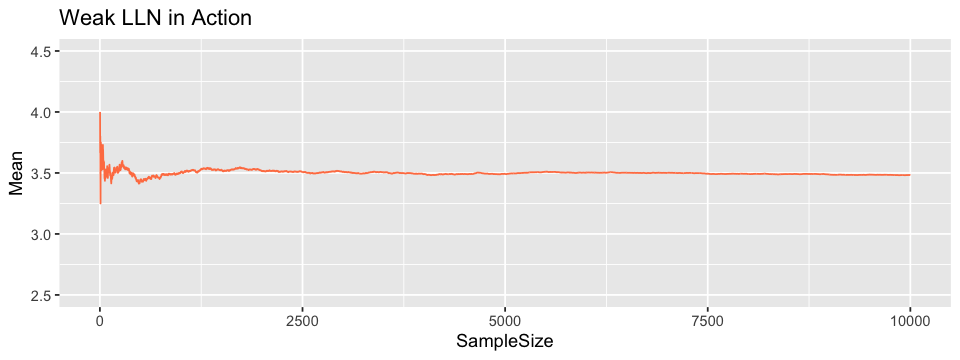

In [431]:
options(repr.plot.width=8, repr.plot.height=3)
ggplot(df1,aes(x=SampleSize,y=Mean))+geom_line(colour='coral',size=0.5)+ylim(2.5,4.5)+ggtitle('Weak LLN in Action')

So what are 'probability limits'? Probability limits are a little theoretical but very well named; they are the asymptotic limits of probabilities! Formally we say that a random variable $X_n$ which depends on sample size $n$ has a probability limit or 'plim' of $X$ (a scalar) if it gets arbitrarily close to X as n increases, or: $\displaystyle{\lim_{n \to \infty}Pr(|X_n-X|>\epsilon)}=0$. Continuing our example we know that a fair dice has a mean of 3.5 so the weak LLN says that the random variable $X_n=\bar{X}=\frac{1}{n}\sum\limits_{i=1}^{n}X_i$ has a plim of 3.5, or $plim(\bar{X})=3.5=\mu$. This might seem simple but it is kind of incredible! It might not seem that obvious why it is incredible for dice (obviously $\mu=3.5$!) but the incredible part is when we have no idea what $\mu$ is. As long as we have independent and identically distributed (i.i.d) random variables we will be able to find their expected value by letting the number of samples approach infinity. We don't even need finite variance! There's a lot we can do with this, as we'll see later on.

What the LLN and plims can also help us with is the concept of 'consistency' or asympototic unbiasedness. We know that an estimator $\hat{X}$ is a biased estimator of the random variable $X$ if $E(\hat{X})\neq E(X)$. For example say create an estimator for the outcome of a dice roll based on the sample average plus a little extra, or $\hat{X}=\bar{X}+\frac{1}{n}$. This is clearly a biased estimator because $E(\hat{X}) =E(X)+\frac{1}{n}\neq E(X)$. However this estimator is still *consistent* because $\displaystyle{\lim_{n \to \infty}\frac{1}{n}}=0$. We will see more of these concepts when we tackle Econometrics III and IIII.

### The Central Limit Theorem<a id='The Central Limit Theorem'></a>

The Central Limit Theorem (CLT) is even cooler in many ways. It states if we have a random sample {$X_1,X_2,...,X_n$} from a known probability distribution with finite variance then we can can make a random variable from this sample which follows the normal distribution. The first thing to unpack here is 'random sample'. This essentially just means that we have a set of i.i.d random variables, or that {$X_1,X_2,...,X_n$} $\sim i.i.d (\mu,\sigma^2)$. The second is how we can 'make' this random variable. From the Weak LLN we covered previously we know that $\bar{X_n} \xrightarrow{ p } \mu$, as n approaches infinity, so we know that $(\bar{X_n}-\mu) \xrightarrow{ p }0$. What the CLT tells us is that $\sqrt{n}(\bar{X_n}-\mu) \xrightarrow{ d } N(0,\sigma^2)$. This $\xrightarrow{ d }$ just means 'approaches in distribution', or 'gets infinitessimally close to the distribution of'. A form of this you're probably more familiar with is: $\bar{X} \sim N(\mu,\dfrac{\sigma^2}{n})$, which is just the distribution of the sample mean. 

This might not seem that amazing but keep in mind that ***the underlying distribution doesn't have to be normal!*** The most incredible example of this is the Bernoulli distribution, the most non-normal distribution possible (it's literally just zeros and ones!). Let's take a random sample of 100 from the $Bernoulli(0.9)$ distribution which we know has a $\mu=0.9$ and a $\sigma^2=0.9(1-0.9)=0.09$:

In [18]:
a<-data.frame(rbinom(100,1,0.9))
head(a,10)

rbinom.100..1..0.9.
<int>
1
1
1
1
1
1
1
1
1


Then we know that $10(\bar{X}-0.9) \xrightarrow{ d } N(0,0.09)$, so $\bar{X}\xrightarrow{ d } N(0.9,0.0009)$. To scale our distribution we need to multiply it by the number of data points multiplied by the length of one bin. Let's test this:

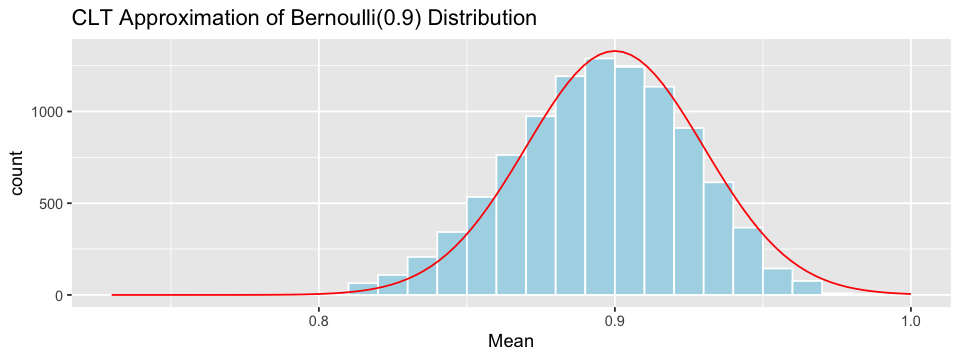

In [28]:
df<-data.frame()
for (i in 1:10000) {df[i,1]<-mean(rbinom(100,1,0.9))}
colnames(df)<-'Mean'
ggplot(df,aes(x=Mean))+geom_histogram(fill='lightblue',colour='white',breaks=c(80+1:20)/100)+
stat_function(fun=function(x,mu,sd){dnorm(x,0.9,0.03)}*100,colour='red')+ ggtitle('CLT Approximation of Bernoulli(0.9) Distribution')

So the data essentially follows the normal distribution $N(0.9,0.0009)$. We can use this approximation with any distribution to show that the Normal distribution always fits the sample means of our data well! Seriously this is an extremely useful property and deserves some testing out for yourself!

  ###  Higher Population Moments<a id='Higher Population Moments'></a>

So far we've only looked at the first two population moments, $E(X)$ and $E(X^2)$ but the next two are also of interest to us. The third population moment $E(X^3)$ can be used to find 'skewness' or how skewed our data is. We've already seen lots of skewed data but let's use an example from our Fifa '19 dataset - `Wage`. As a general rule income data will probably be positively skewed (lots of outliers on the right of the distribution) because in essentially every group there will be some people earning far, far more than the median wage:

In [21]:
data[,'Wage']<-gsub('K','',data[,'Wage'])
data[,'Wage']<-gsub('€','',data[,'Wage'])
data[,'Wage']<-as.numeric(data[,'Wage'])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   1.000   3.000   9.731   9.000 565.000 

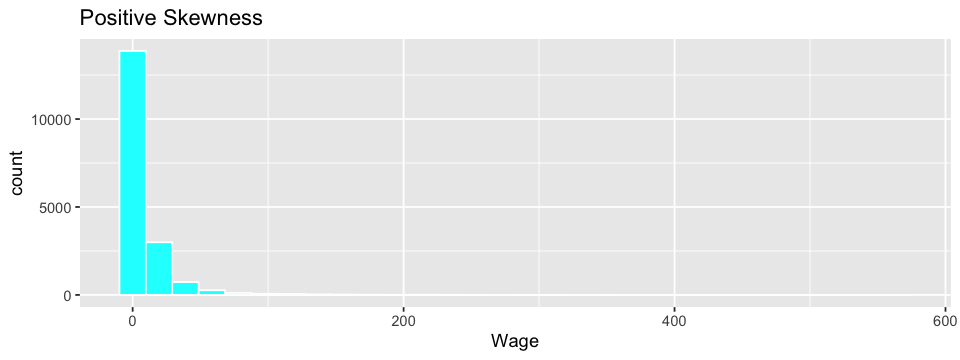

In [32]:
options(repr.plot.width=8, repr.plot.height=3)
ggplot(data,aes(Wage))+geom_histogram(fill='cyan',colour='white',bins=30)+ggtitle('Positive Skewness')
summary(data[,'Wage'])

Even the summary statistics should tell us a lot - 75% of players earn €9,000 or less per week but the top footballer (Ronaldo - check it if you want) earns more than 50 times that. How can we check the skewness of this wage data using the third population moment? Well to start with we can't use the third population moment $E(X^3)$ because we don't know anything about the population this data comes from, so we have to use the third *sample* moment $\frac{1}{n} \sum\limits_{i=1}^{n}(x_i)^3$. More importantly we actually want the third *centralised* sample moment $\frac{1}{n} \sum\limits_{i=1}^{n}(x_i-\bar{x})^3$. And in order to deal with our 'variance problem' of our units of measurement now being in €$^3$ we divide this by standard deviation cubed to get $Skew(X)=\dfrac{\frac{1}{n} \sum\limits_{i=1}^{n}(x_i-\bar{x})^3}{\sqrt{\frac{1}{n-1} \sum\limits_{i=1}^{n}(x_i-\bar{x})^2}^{ 3}}$, or in our data:

In [23]:
(1/nrow(data))*sum((data[,'Wage']-mean(data[,'Wage']))^3)/(sd(data[,'Wage'])^3)

[1] 7.904716

This is ridiculously high. A distribution can be considered close to normal if its skewness is less than +/-1. 7.9 indicates we have very positively skewed data. What about Kurtosis? Kurtosis is a measure of the 'thickness' of our tails, which we covered somewhat when we looked at the t-distribution. We calculate Kurtosis in much the same way as Skewness, but using the fourth population moment as follows and subtracting 3 from the result:

$Kurt(X)=\dfrac{\frac{1}{n} \sum\limits_{i=1}^{n}(x_i-\bar{x})^4}{\sqrt{\frac{1}{n-1} \sum\limits_{i=1}^{n}(x_i-\bar{x})}^{ 4}}-3$

Which is:

In [24]:
(1/nrow(data))*sum((data[,'Wage']-mean(data[,'Wage']))^4)/(sd(data[,'Wage'])^4)-3

[1] 100.673

Once again this ridiculously high as we expect a Kurtosis of 0 for a Normal distribution. We won't dwell on these two statistics here but they are good to know and make for a bit of extension to finish off our final notebook before beginning metrics in Econometrics I!